# Throwing a javelin

We've been given the following problem to solve:

**Speerwurf**: Die Flugbahn eines Speeres kann ohne Berücksichtigung der Luftreibung durch die Funktion $f$ mit $f(x) = -0,02625 x^2 + x + 2$ beschrieben werden.  Dabei bezeichnet $x$ die horizontale Entfernung vom Abwurfpunkt und $f(x)$ die Höhe des Speeres über dem Boden in Meter.

  - a) Bestimmen Sie den Punkt, an dem der Speer auf den Boden trifft.
  - b) Bestimmen Sie den höchsten Punkt der Flugbahn.
  - c) Bestimmen Sie die Weite und den höchsten Punkt, wenn die Flugbahn durch $f(x) = -0,03 x^2 + x + 2$ beschrieben wird.

## Translation into English

As is common in such situations, we first have to translate the text from the original German into a language we are a bit more familiar with, in our case: English.  One translation of the question might look like this:

**Javelin throw**: the flight path of a javelin (excluding the effects of air resistance) can be described by the function $f(x) = -0.0265 x^2 + x + 2$, where $x$ describes the horizontal distance (in metres) from the point where the javelin was thrown and $f(x)$ describes the height of the javelin above the ground (also in metres).

  - a) determine the point at which the javelin hits the ground.
  - b) determine the highest point of the javelin's path.
  - c) determine the distance and highest point when the path is described by $f(x) = -0.03 x^2 + x + 2$.

Let's pick this apart a bit.

**Speer**: There are two ways to translate the word Speer into English, depending upon context.  In the context of sport (such as at the Olympic Games for instance), then a Speer is called a [javelin](https://en.wikipedia.org/wiki/Javelin_throw) in English.  However, in the context of its use as a weapon (for instance in its use in medieval Europe or ancient Greece), then it would be called a [spear](https://en.wikipedia.org/wiki/Spear) (the term "javelin" does turn up in the warfare context as a [type of light spear](https://en.wikipedia.org/wiki/Javelin)).

**Berücksichtigung**: A noun meaning to take something into consideration.  The important parts of the word are "rück" indicating "backwards" or "behind" and "Sicht" meaning sight.  In other words if you look at things things behind you, then the idea is that you're taking them into consideration as well as the things in front of you (which you're already taking into consideration).

**Luftreibung**: I translated this as "[air resistance](https://en.wikipedia.org/wiki/Drag_(physics))", however one could also translate this as "air friction" or "friction due to the air", but "air resistance" felt like the more standard term.  If one literally translates this word then one gets "air rubbing", hence why "air friction" could be a valid translation as that's all that friction is: a kind of rubbing which tends to slow things down.

**Flugbahn**: Literally translated this ends up being "flight path" which is also a valid actual translation.  One could also use the word "trajectory" here.  Note that although the word "Bahn" is often used in connection with trains, the word actually has a much more general meaning of "path" or "way", which one can see in the English word "railway" which relates to the German "Eisenbahn" (iron way/path; note that rails for trains are made of iron).

**Abwurfpunkt**: The translation I use here is "the point from which the javelin is thrown" and is one of those situations where a German word (although seemlingly quite long) is actually significantly shorter than the equivalent English (it's got to happen *sometimes*, right?).  Pulling the word apart we have

  - "ab" which is the preposition for "away" or "down" and gives the sense of something moving away from a given point.
  - "Wurf" the word for "throw".
  - "Punkt" the word for "point".

Thus we could call this the "away-throw-point" which, although one can understand the sense of what's going on here, it's going to sound a bit weird in an English speaker's ears.

## Plotting the function

Because computers are good at plotting data, and because plotting curves is a good way to get a feel for what the function looks like, let's now plot the function $f(x)$.  To do this, we'll use a little bit of [Python](https://www.python.org/).

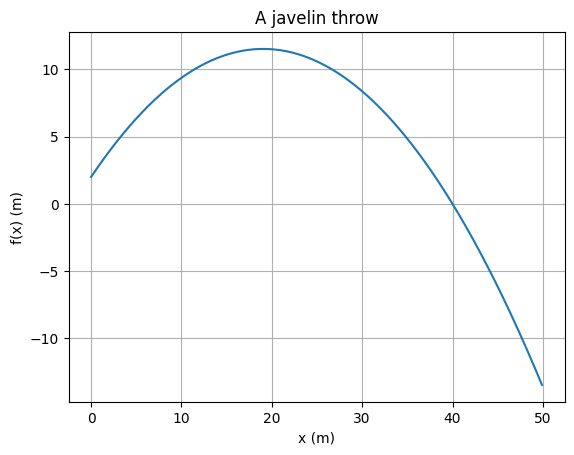

In [1]:
import numpy as np  # import the numerical libraries and give them the name "np"
import matplotlib.pyplot as plt  # import the plotting libraries and give them the name "plt"

# define the function we want to plot
# this uses the general form of a parabola: a x^2 + b x + c
def f(x, a=-0.02625, b=1, c=2):
    return a*x**2 + b*x + c

# define a range of x points (which we call "xs" here) from 0 to 50 metres in steps of 0.1m
xs = np.arange(0, 50, 0.1)
# determine the values on the y-axis from the function f(x) which we defined above (which we call "fs" here)
fs = [f(x) for x in xs]

fig, ax = plt.subplots()  # set up the plot
# set the axes labels and plot title
ax.set_xlabel('x (m)')
ax.set_ylabel('f(x) (m)')
ax.set_title('A javelin throw')
# plot the data
ax.plot(xs, fs)
# add a grid to the plot to more easily see the function's values
plt.grid()
# show the plot
plt.show()

Note that the above Python code is editable, so try changing some of the values and then select "Run selected cell" from the "Run" menu to see what effect changing the numbers has on the shape of the function.

Note also that I simply guessed the necessary range of $x$ values; it was clear from the question that the values should start at 0, but the value of 50 was just a guess.

Now that we've plotted the function, some things become more obvious: the javelin is thrown from some initial non-zero height above the ground (i.e. the curve doesn't cross the $y$-axis at the value 0) which makes sense because someone throwing the javelin will be holding it in their hand above their head and this some positive value.  We can work out exactly what this value is by setting $x = 0$ (the javelin's starting point) in the equation for the function:

$$
f(0) = -0.02625 \cdot 0^2 + 0 + 2 = 2m
$$

In other words, the javelin is held 2m above the ground when it is let go.

We also get to see some other information: the curve crosses the $x$ axis at approximately 40m distance, so this gives us a ballpark estimation of what value we might get for part (a) of the question.  The fact that we have negative height values is simply because I chose $x$ values from 0 to 50 and from roughly 40m up to 50m the function becomes negative.  We know that this isn't a physically logical situation (I mean, the javelin would have had to have hit the ground *very hard* for it to go almost 15m below ground level!), so we can ignore the negative $f(x)$ values in this upper range.

One thing that the plot hints at but doesn't explicitly mention is that we could extend the curve in the *negative* $x$ direction to see where the javelin might have come from had it started its trajectory from the ground level; after all, we can equally well put negative $x$ values into $f(x)$ as we can positive $x$ values.

Now that we've got some intuition about the problem at hand, let's start solving things exactly.

## Determining the point at which the javelin hits the ground

To make our job a bit easier, we can rewrite the function more generally like so:

$$
f(x) = a x^2 + b x + c
$$

where in our case $a = -0.02625$, $b = 1$ and $c = 2$.  If we were writing this out by hand, this change would save us from having to write long decimal numbers such as -0.02625 all of the time and reduces the risk of missing a decimal place or a minus sign, hence it's usually a good idea to write a function like we have here in its general form so that we can manipulate it more easily and then simply enter the required numbers at the end of any algebraic manipulations we might need to make.

Note that the coefficient $a$ is negative: this means that the parabola curves upwards to a maximum and then curves downwards again (because mathematicians love giving things names, this is called a [*concave* function](https://en.wikipedia.org/wiki/Concave_function)).  A positive value of $a$ will curve downwards to a minimum and then curve upwards again (which is then called a [*convex* function](https://en.wikipedia.org/wiki/Convex_function)).  Try changing the value of $a$ in the Python code above to see what effect changing its sign has.

To find out where the javelin hits the ground, we need to work out when $f(x)$ is equal to zero (i.e. at ground level).  This is the same thing as working out where the curve from the plot above crosses the $x$ axis.  Note that because the function is a [parabola](https://en.wikipedia.org/wiki/Parabola) (i.e. a [polynomial](https://en.wikipedia.org/wiki/Polynomial) of degree 2) this will happen in two places: one at the end of the javelin's path of flight and one *behind* where the javelin was let go (the function merely models the physical situation, it doesn't have to *always* match physical reality; remember: [all models are wrong, but some models are useful](https://en.wikipedia.org/wiki/All_models_are_wrong)).  Finding where a function crosses the $x$ axis is also called *[finding the roots of a function](https://en.wikipedia.org/wiki/Zero_of_a_function)* where a *root* in this sense is one value of $x$ where $f(x)$ is equal to zero.

Because the function $f(x)$ is a polynomial of degree 2 (its largest exponential is a 2) this is also called a [quadratic equation](https://en.wikipedia.org/wiki/Quadratic_equation).  There is a known equation for the roots of a quadratic equation (the values of $x$ where $f(x) = 0$) which is (confusingly) known as the [quadratic formula](https://en.wikipedia.org/wiki/Quadratic_formula):

$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

This formula gives us two values, one of which is where the javelin hits the ground.  Let's call the two values $x_1$ and $x_2$ respectively:

$$
x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a}
$$

and

$$
x_2 = \frac{-b - \sqrt{b^2 - 4ac}}{2a}
$$

Plugging in our values for $a$, $b$ and $c$, we get:

In [2]:
a = -0.02625
b = 1
c = 2

x1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
x2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

Which gives:

$x_1 = ${eval}`x1` and $x_2 = ${eval}`x2`.

In other words, the javelin hit the ground after 40m.  The value for $x_1$ is negative which tells us that it's a position *behind* the person throwing the javelin and is thus a solution that we can disregard as not making physical sense.

## Determining the highest point of the javelin's path (method 1)

If we look at the plot of the function from above, we can see that when the javelin reaches its highest point, that the slope of its path is completely flat.  Up to that point the slope of the javelin's path is pointing upwards and after the highest point the slope of the javelin's path is pointing downwards.  The slope of a curve at a given point is given by its [tangent](https://en.wikipedia.org/wiki/Tangent).  The tangent to a curve at a given point (and hence the curve's slope at that point) can be determined by taking the [derivative](https://en.wikipedia.org/wiki/Derivative) of the function at that point.  For our function $f(x)$, we can take its derivative and thus find the function's slope at any given point $x$ along its path.  You will often see the derivative of a function written as $f'(x)$ or as $\frac{df}{dx}$; they mean the same thing.  To take the derivative of a power such as $x^n$, simply take the value $n$ and multiply it by the power reduced by 1, i.e. the derivative of $x^n$ is $n x^{n-1}$.  We can apply this rule to our function $f(x)$ term-by-term in the expression.  Therefore the derivative of

$$
f(x) = ax^2 + bx + c
$$

is

$$
f'(x) = 2ax + b
$$

where we have used the fact that taking the derivative of a constant is zero (because its value doesn't change as we change the value of $x$).

Since we know that the tangent to the function is completely flat at the highest point of the javelin's path, we can say that the slope at this point is zero and hence we just need to find the value of $x$ where the derivative is equal to zero.  I.e. we need to solve this equation for $x$:

$$
f'(x) = 0 = 2ax + b
$$

Subtracting $b$ from both sides of the equation we get

$$
-b = 2ax
$$

and dividing both sides of the equation by $2a$ we find the value of $x$ when the javelin is at its highest point:

$$
x = \frac{-b}{2a}
$$

Plugging in the values for $a$ and $b$ we get:

In [3]:
a = -0.02625
b = 1

x = -b/(2*a)

which is {eval}`x` m.

Does this value make sense?  It certainly looks like the highest point is slightly less than 20m from the plot of the function we made above, so that's a good indicator that this value does make sense.  We found that the javelin hit the ground 40m after having been thrown so it makes sense that the highest point would be at approximately 20m (because a parabola is symmetric across its maximum (or minimum if it is convex)), but the value should be a little bit smaller than 20m because the javelin was thrown not from a height of 0m above the ground but at a height of 2m above the ground.  In other words, yes, this value does make sense.

## Determining the highest point of the javelin's path (method 2)

Another way of working out what the highest point of the javelin's path is, is to realise that a parabola is symmetric along the $x$ axis: half of the function lies on one side of the highest point and the other half of the function is on the other side of the highest point.  We can use this property as well as the roots of the equation that we calculated earlier to work out where the highest point of the javelin's trajectory is (and now we see that it actually *was* helpful to calculate the root of the equation behind the thrower).

The highest point of the javelin's path will be half way between the two roots.  The distance between the two roots is: $x_2 - x_1 = $ {eval}`x2 - x1` m.  The location of the highest point will be half of the distance between the two roots plus the position of the point behind the thrower (or equivalently the position where the javelin hits the ground minus half the distance between the two roots).  I.e.:

$$
\mathrm{highest\ point} = \frac{x_2 - x_1}{2} + x_1
$$

which is {eval}`(x2 - x1)/2 + x1` m which matches the value we got by using the previous method.

If we use the point where the javelin hits the ground, we get the same result:

$$
\mathrm{highest\ point} = x_2 - \frac{x_2 - x_1}{2}
$$

which is {eval}`x2 - (x2 - x1)/2` m and equals the two other results for this value that we computed previously.

## Determining the distance and highest point when the path is described by $f(x)=−0.03x^2+x+2$

We're now being asked a very similar question to that which we already have an answer.  Because of this similarity, it makes sense to compare the two functions with one another:

$$
f_1(x) = -0.0265 x^2 + x + 2\\
f_2(x) = -0.03 x^2 + x + 2
$$

where we've labelled the functions according to the order in which they were presented to us in the question.

We note immediately that there's only one difference between the two functions: the $a$ coefficient is a more negative value in $f_2(x)$.  What does this tell us about the values the function will take?  Because the component with the highest exponent has a more negative coefficient, we would expect the height to be lower than in the initial example and the distance to be less than in the initial example.  Why?  Well, the more negative value will "put pressure" on the function to come down sooner than in the initial example we investigated.  Let's plot the function to see if our intuition is correct.

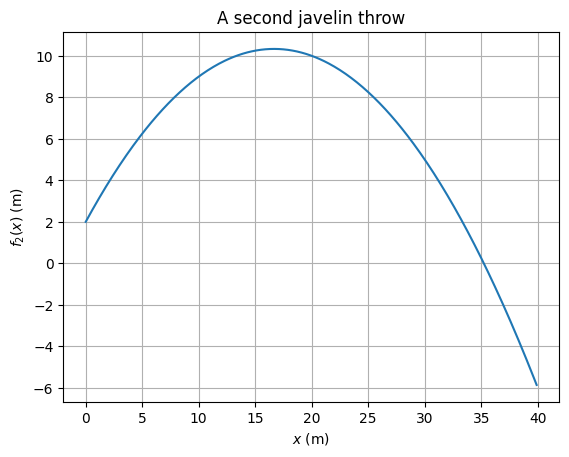

In [4]:
# we've already imported the numerical and plotting libraries earlier, hence we don't need to do this again

# we've also defined the function to plot in a general way earlier;
# we just need to specify the "a" value when generating the list of "fs" this time

# define a shorter list of x points from 0 to 40 metres in steps of 0.1m
xs = np.arange(0, 40, 0.1)
# determine the values on the y-axis from the function f(x) with the updated "a" value
fs = [f(x, a=-0.03) for x in xs]

fig, ax = plt.subplots()  # set up the plot
# set the axes labels and plot title
ax.set_xlabel('$x$ (m)')
ax.set_ylabel('$f_2(x)$ (m)')
ax.set_title('A second javelin throw')
# plot the data
ax.plot(xs, fs)
# add a grid to the plot to more easily see the function's values
plt.grid()
# show the plot
plt.show()

This result matches our intuition: the distance thrown seems to be approximately 35m this time and the highest point looks to be approximately 17m.

Using the quadratic formula again to work out at which $x$ values $f_2(x)$ is zero, we have:

$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

In [5]:
a2 = -0.03
b = 1
c = 2

x1_new = (-b + np.sqrt(b**2 - 4*a2*c))/(2*a2)
x2_new = (-b - np.sqrt(b**2 - 4*a2*c))/(2*a2)

Which gives:

$x_{1new} = ${eval}`x1_new` and $x_{2new} = ${eval}`x2_new`.

In other words, the javelin hit the ground after {eval}`x2_new`m.  Again, the value for $x_{1new}$ is negative which tells us that it's a position *behind* the person throwing the javelin and is thus a solution that we can disregard as not making physical sense.

The highest point can again be found by taking the derivative of the general form of the function and plugging in the values for $a$ and $b$:

$$
x_{new} = \frac{-b}{2a_2}
$$

In [6]:
a2 = -0.03
b = 1

x_new = -b/(2*a2)

which is {eval}`x_new` m which is close to the value we guessed from looking at the plotted the curve above and is less than the $\approx 19.05$m we got from the first example, thus also matching our intuition we formulated at the start of this section.